In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error as ms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as sf
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score as score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import accuracy_score, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.svm import SVC, SVR
from sklearn.dummy import DummyClassifier
from collections import Counter
import graphviz
from sklearn.tree import export_graphviz as graph
from imblearn.over_sampling import SMOTE
import time
from sklearn.tree import plot_tree, export_text

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/praloysinha/Capstone/main/data.csv")

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Understanding the features

1. The categorical features are already encoded in the data as we can see below in the features details data
2. It has various demographic, educational and macro-economic data
3. Only the Target variable is categorical as it has graduate, enrolled or dropout



In [ ]:
feature_det = pd.read_excel("https://raw.githubusercontent.com/praloysinha/Capstone/main/feature_desc.xlsx")

In [ ]:
feature_det

,Variable Name,Role,Type,Demographic,Description
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...
1,Application mode,Feature,Integer,NaN,1 - 1st phase - general contingent 2 - Ordinan...
2,Application order,Feature,Integer,NaN,Application order (between 0 - first choice; a...
3,Course,Feature,Integer,NaN,33 - Biofuel Production Technologies 171 - Ani...
4,Daytime/evening attendance,Feature,Integer,NaN,1 – daytime 0 - evening
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...
6,Previous qualification (grade),Feature,Continuous,NaN,Grade of previous qualification (between 0 and...
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...


In [ ]:
feature_det["Description"].unique()

array(['1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated',
       '1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)',
       'Application order (between 0 - first choice; and 9 last choice)',
       '33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 90

In [ ]:
# No missing values were found in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Explored whether the data has imbalanced classes. The "Graduate" class is ~3 times the "enrolled" class and hence is greatly imbalanced
# We need to balance the data with SMOTE for better modelling
fig = px.pie(df, values=Counter(df["Target"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Target"]))

Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


Counter({1: 3919, 2: 379, 4: 91, 5: 25, 6: 6, 3: 4})


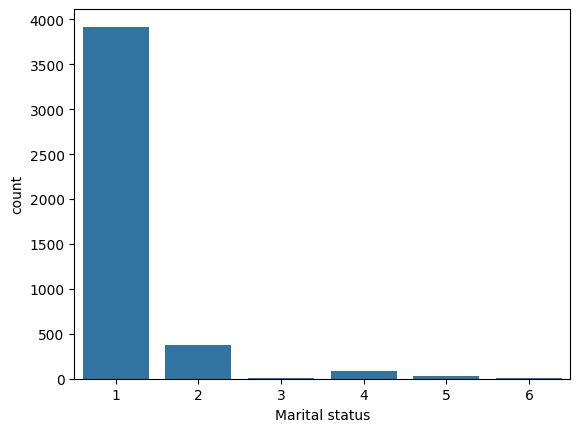

In [ ]:
# Almost 90% of the respondents are single
sns.countplot(data=df,x="Marital status")
print(Counter(df["Marital status"]))

Counter({1: 1708, 17: 872, 39: 785, 43: 312, 44: 213, 7: 139, 18: 124, 42: 77, 51: 59, 16: 38, 53: 35, 15: 30, 5: 16, 10: 10, 2: 3, 57: 1, 26: 1, 27: 1})


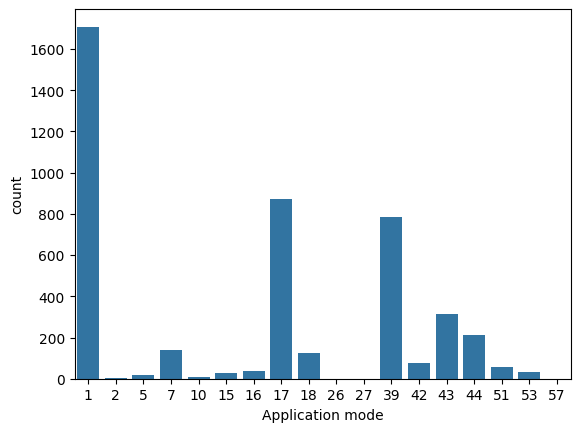

In [ ]:
# The majority of the respondents are 1st Phase: General Contingent
sns.countplot(data=df,x="Application mode")
print(Counter(df["Application mode"]))

Counter({1: 3026, 2: 547, 3: 309, 4: 249, 5: 154, 6: 137, 9: 1, 0: 1})


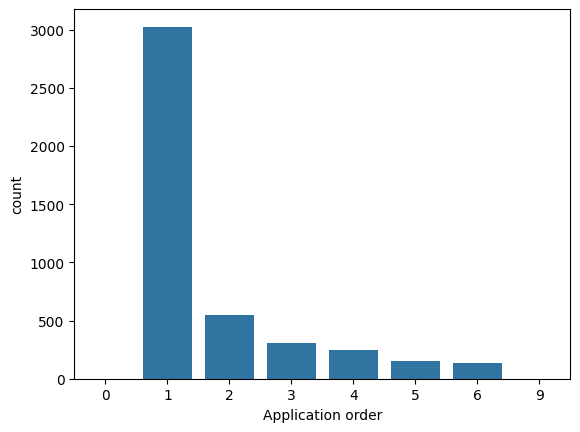

In [ ]:
# Almost 80% of the respondents are in Second Choice
sns.countplot(data=df,x="Application order")
print(Counter(df["Application order"]))

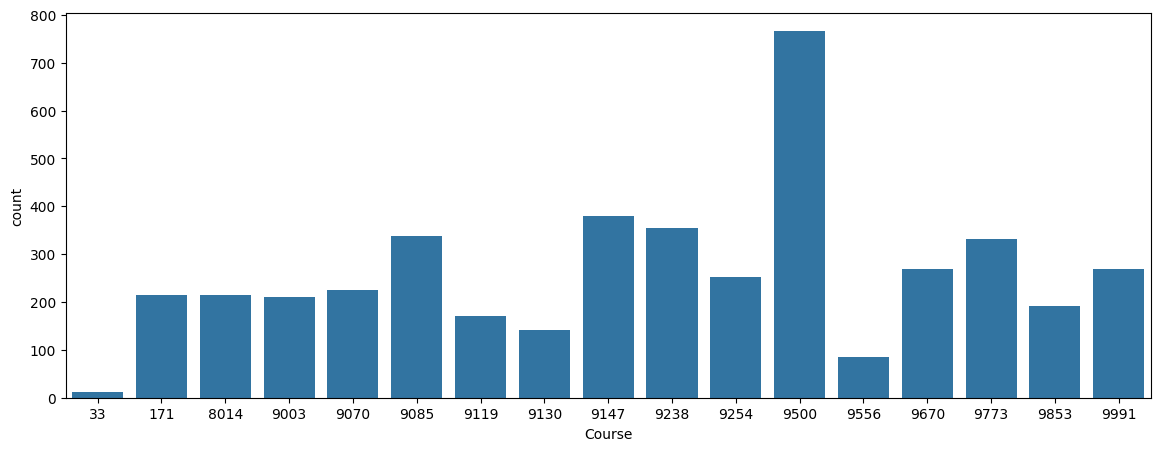

Counter({9500: 766, 9147: 380, 9238: 355, 9085: 337, 9773: 331, 9991: 268, 9670: 268, 9254: 252, 9070: 226, 171: 215, 8014: 215, 9003: 210, 9853: 192, 9119: 170, 9130: 141, 9556: 86, 33: 12})


In [ ]:
# The highest number of respondents have enrolled for the Nursing course
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=df,x="Course")
plt.show()
print(Counter(df["Course"]))

In [ ]:
#  Almost 90% of the respondents are in the daytime course
fig = px.pie(df, values=Counter(df["Daytime/evening attendance\t"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Daytime/evening attendance\t"]))

Counter({1: 3941, 0: 483})


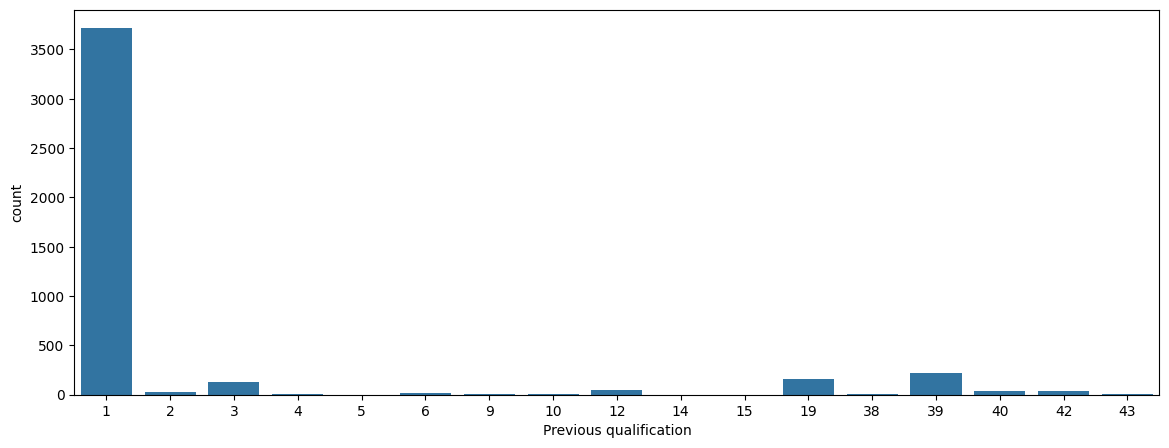

Counter({1: 3717, 39: 219, 19: 162, 3: 126, 12: 45, 40: 40, 42: 36, 2: 23, 6: 16, 9: 11, 4: 8, 38: 7, 43: 6, 10: 4, 15: 2, 5: 1, 14: 1})


In [ ]:
# More than 80% of the respondenst have Secondary education as previous qualification
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=df,x="Previous qualification")
plt.show()
print(Counter(df["Previous qualification"]))

In [ ]:
# Quite a widepspread distribution with 133 as median score
px.violin(df,x = "Previous qualification (grade)")

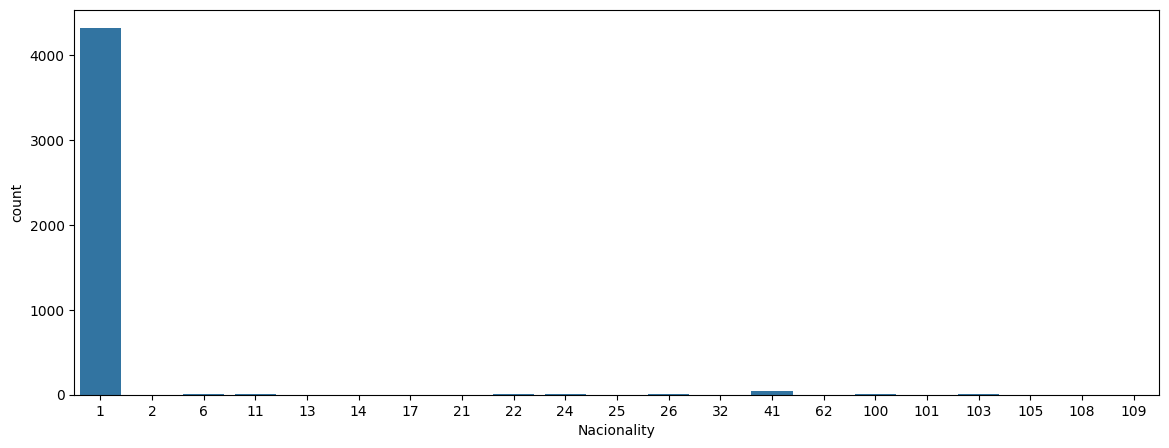

Counter({1: 4314, 41: 38, 26: 14, 6: 13, 22: 13, 24: 5, 103: 3, 11: 3, 100: 3, 62: 2, 25: 2, 21: 2, 101: 2, 2: 2, 105: 2, 13: 1, 32: 1, 109: 1, 108: 1, 14: 1, 17: 1})


In [ ]:
# Almost all respondenst have Portugese nationality adn hence we can ignore this feature # drop this feature
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=df,x="Nacionality")
plt.show()
print(Counter(df["Nacionality"]))

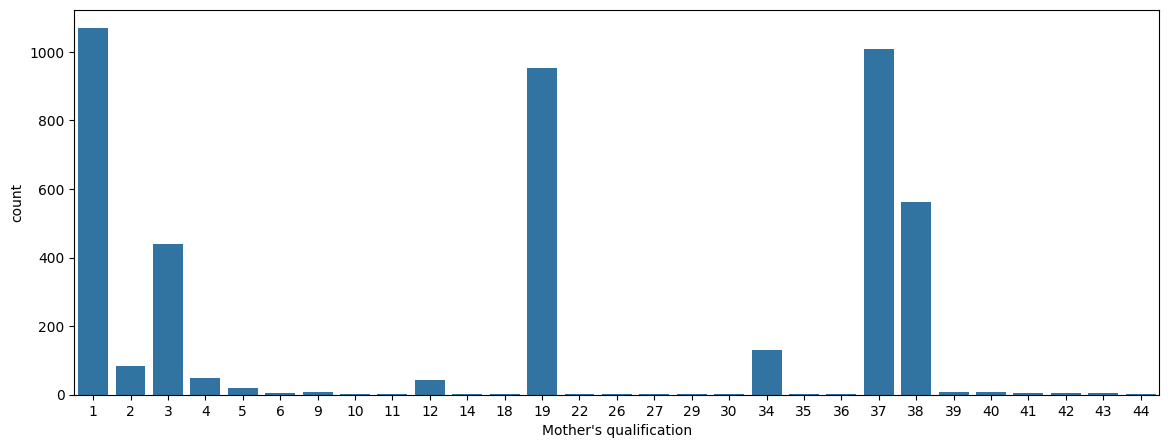

Counter({1: 1069, 37: 1009, 19: 953, 38: 562, 3: 438, 34: 130, 2: 83, 4: 49, 12: 42, 5: 21, 40: 9, 9: 8, 39: 8, 41: 6, 42: 4, 6: 4, 43: 4, 11: 3, 30: 3, 35: 3, 36: 3, 10: 3, 29: 3, 14: 2, 18: 1, 22: 1, 27: 1, 26: 1, 44: 1})


In [ ]:
# The top ones are secondary education, Basic education (1st cycle) and Basic education (3rd cycle)
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=df,x="Mother's qualification")
plt.show()
print(Counter(df["Mother's qualification"]))

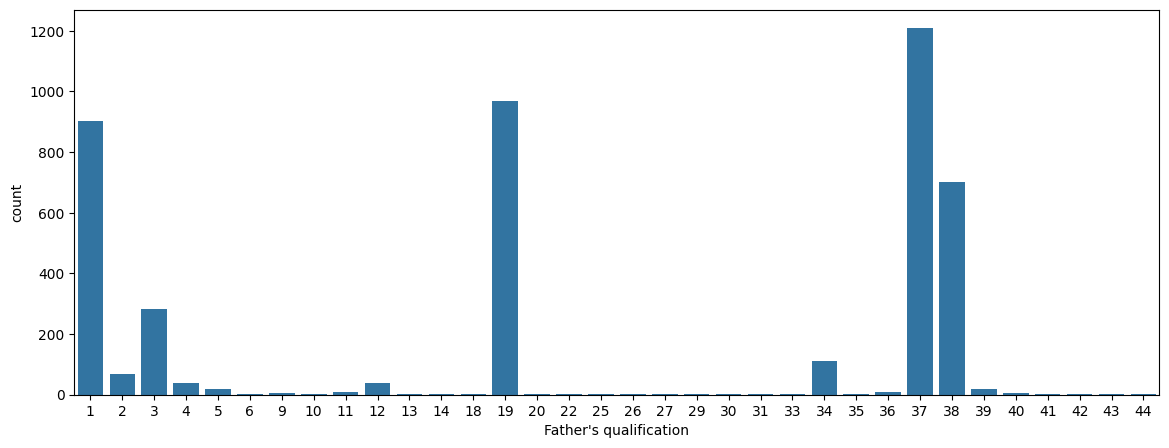

Counter({37: 1209, 19: 968, 1: 904, 38: 702, 3: 282, 34: 112, 2: 68, 4: 39, 12: 38, 39: 20, 5: 18, 11: 10, 36: 8, 9: 5, 40: 5, 14: 4, 22: 4, 30: 4, 29: 3, 26: 2, 35: 2, 41: 2, 43: 2, 10: 2, 6: 2, 20: 1, 13: 1, 18: 1, 42: 1, 25: 1, 44: 1, 33: 1, 27: 1, 31: 1})


In [ ]:
# The top ones are secondary education, Basic education (1st cycle) and Basic education (3rd cycle)
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=df,x="Father's qualification")
plt.show()
print(Counter(df["Father's qualification"]))

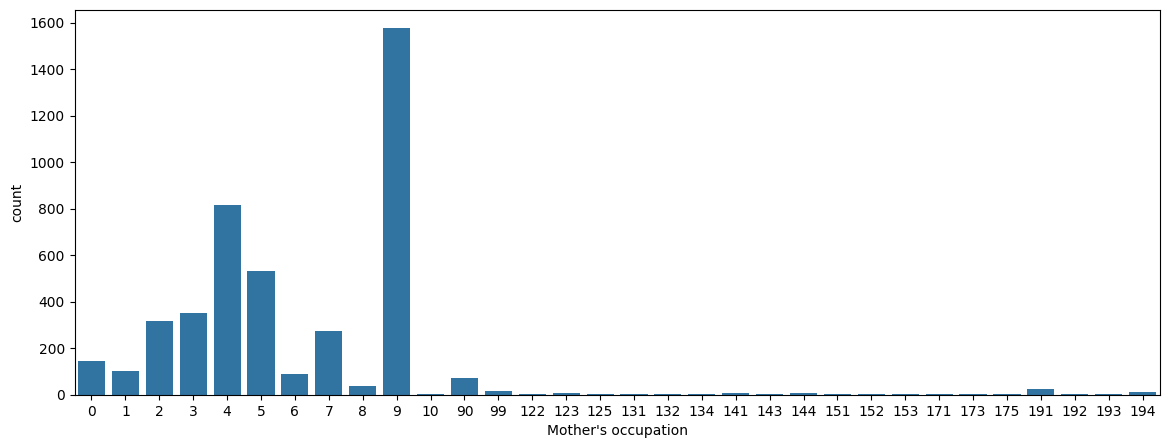

Counter({9: 1577, 4: 817, 5: 530, 3: 351, 2: 318, 7: 272, 0: 144, 1: 102, 6: 91, 90: 70, 8: 36, 191: 26, 99: 17, 194: 11, 141: 8, 123: 7, 144: 6, 175: 5, 192: 5, 134: 4, 10: 4, 193: 4, 151: 3, 132: 3, 143: 3, 152: 2, 122: 2, 153: 2, 125: 1, 173: 1, 131: 1, 171: 1})


In [ ]:
# The top ones are Unskilled workers and Administrative Staff
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=df,x="Mother's occupation")
plt.show()
print(Counter(df["Mother's occupation"]))

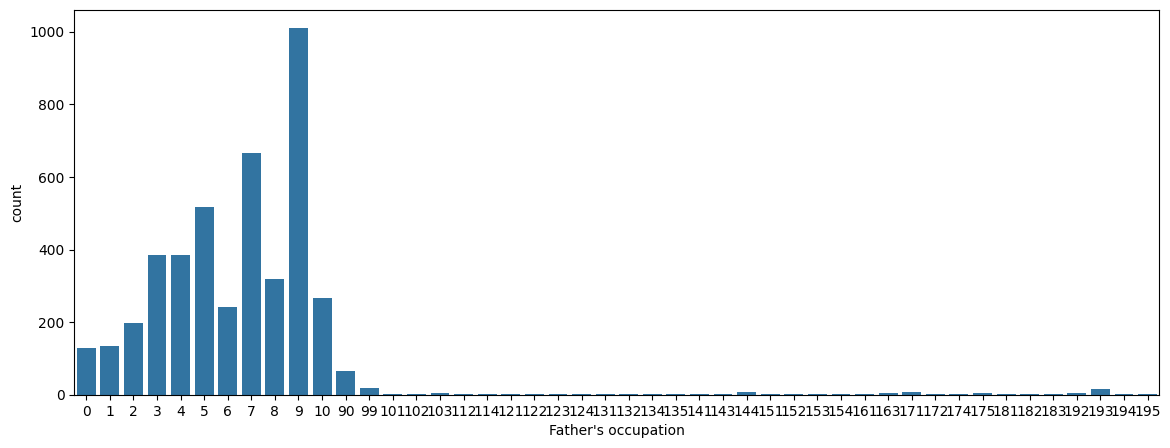

Counter({9: 1010, 7: 666, 5: 516, 4: 386, 3: 384, 8: 318, 10: 266, 6: 242, 2: 197, 1: 134, 0: 128, 90: 65, 99: 19, 193: 15, 144: 8, 171: 8, 192: 6, 163: 5, 175: 4, 103: 4, 135: 3, 152: 3, 183: 3, 181: 3, 123: 3, 151: 2, 182: 2, 194: 2, 172: 2, 122: 2, 102: 2, 112: 2, 124: 1, 121: 1, 195: 1, 161: 1, 132: 1, 131: 1, 143: 1, 134: 1, 153: 1, 174: 1, 141: 1, 114: 1, 101: 1, 154: 1})


In [ ]:
# The top ones are Unskilled workers and Skilled Workers in Industry, Construction and Craftsmen
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(data=df,x="Father's occupation")
plt.show()
print(Counter(df["Father's occupation"]))

In [ ]:
# Quite a widepspread distribution with 126 as median score
px.violin(df,x = "Admission grade")

In [ ]:
# Balanced distribution
fig = px.pie(df, values=Counter(df["Displaced"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Displaced"]))

Counter({1: 2426, 0: 1998})


In [ ]:
# Almost all respondents are with no special needs. We can ignore this feature #drop feature
fig = px.pie(df, values=Counter(df["Educational special needs"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Educational special needs"]))

Counter({0: 4373, 1: 51})


In [ ]:
# ~90% of the respondents dont have debtors
fig = px.pie(df, values=Counter(df["Debtor"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Debtor"]))

Counter({0: 3921, 1: 503})


In [ ]:
# ~90% of the respondents have tuition fes upto date
fig = px.pie(df, values=Counter(df["Tuition fees up to date"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Tuition fees up to date"]))

Counter({1: 3896, 0: 528})


In [ ]:
# ~65% of the respondents are female
fig = px.pie(df, values=Counter(df["Gender"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Gender"]))

Counter({0: 2868, 1: 1556})


In [ ]:
# ~25% of the respondents are haev scholarships
fig = px.pie(df, values=Counter(df["Scholarship holder"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["Scholarship holder"]))

Counter({0: 3325, 1: 1099})


In [ ]:
# Majority of the respondents below 22
px.violin(df,x = "Age at enrollment")

In [ ]:
# ~98% respondents are not internation. We can ignore this feature #drop feature
fig = px.pie(df, values=Counter(df["International"]),color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(Counter(df["International"]))

Counter({0: 4314, 1: 110})


In [ ]:
#Almost all repondents had zero credits and rest of the numbers had very few instances. We can ignore this feature #drop feature
px.violin(df,x = "Curricular units 1st sem (credited)")

In [ ]:
#Almost all repondents had between 5 and 8
px.violin(df,x = "Curricular units 1st sem (enrolled)")

In [ ]:
#Almost all repondents had between 3 and 12
px.violin(df,x = "Curricular units 1st sem (evaluations)")

In [ ]:
#Almost all repondents had between 0 and 7
px.violin(df,x = "Curricular units 1st sem (approved)")

In [ ]:
#Almost all repondents had between 0 and between 10 and 15
px.violin(df,x = "Curricular units 1st sem (grade)")

In [ ]:
#Almost all repondents had zero credits and rest of the numbers had very few instances. We can ignore this feature #drop feature
px.violin(df,x = "Curricular units 1st sem (without evaluations)")

In [ ]:
#Almost all repondents had zero credits and rest of the numbers had very few instances. We can ignore this feature #drop feature
px.violin(df,x = "Curricular units 2nd sem (credited)")

In [ ]:
#Almost all repondents had between 5 and 8
px.violin(df,x = "Curricular units 2nd sem (enrolled)")

In [ ]:
#Almost all repondents had between 4 and 12
px.violin(df,x = "Curricular units 2nd sem (evaluations)")

In [ ]:
#Almost all repondents had between 0 and 7
px.violin(df,x = "Curricular units 2nd sem (approved)")

In [ ]:
#Almost all repondents had between 0 and between 10 and 15
px.violin(df,x = "Curricular units 2nd sem (grade)")

In [ ]:
#Almost all repondents had zero credits and rest of the numbers had very few instances. We can ignore this feature #drop feature
px.violin(df,x = "Curricular units 2nd sem (without evaluations)")

In [ ]:
#Widely distributed unemployment rate
px.violin(df,x = "Unemployment rate")

In [ ]:
#Widely distributed unemployment rate
px.violin(df,x = "Inflation rate")

In [ ]:
#Widely distributed unemployment rate
px.violin(df,x = "GDP")

In [ ]:
# We are dropping columns due to above mentioned reasons - ["Nacionality", "Educational special needs", "International", Curricular units 1st sem (credited)", "Curricular units 1st sem (without evaluations)", 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)']

df1 = df.drop(columns = ["Nacionality", "Educational special needs", "International",
                         "Curricular units 1st sem (credited)", "Curricular units 1st sem (without evaluations)", 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)'])
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,19,12,5,...,0,0.000000,0,0,0,0.000000,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,3,3,...,6,14.000000,6,6,6,13.666667,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,0.000000,6,0,0,0.000000,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,38,37,5,...,6,13.428571,6,10,5,12.400000,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,37,38,9,...,5,12.333333,6,6,6,13.000000,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,5,...,5,13.600000,6,8,5,12.666667,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,1,1,9,...,6,12.000000,6,6,2,11.000000,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,37,37,9,...,7,14.912500,8,9,1,13.500000,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,37,37,7,...,5,13.800000,5,6,5,12.000000,9.4,-0.8,-3.12,Graduate


The Business Objective is to evaluate the different classifers like KNN,Logistic Regression, Decision Tree and Support Vector Machines on the college dropout dataset in predicting the right classification whether the persons are enrolled, graduate or dropout.

The approach will be to model using these classifiers on the different demographic and education and data of the persons and a few macroeconomic data. In this business problem, we should ideally be able to predict as many people who are likely to dropout of the college and take corrective action. We will try to optimize the accuracy of the model

In [ ]:
#Creating the feature and Target variables
X1 = df1.drop(columns = "Target")
y = df1["Target"]
print(Counter(y))

Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


In [ ]:
# Created a balanced data using SMOTE
oversample = SMOTE()
X1,y = oversample.fit_resample(X1,y)
print(Counter(y))

Counter({'Dropout': 2209, 'Graduate': 2209, 'Enrolled': 2209})


In [ ]:
#Created the test - train split
X_train,X_test,y_train,y_test = train_test_split(X1,y)

In [ ]:
models = {
    'Dummy Classifier' : DummyClassifier(strategy = "stratified"),
    'Logistic Regression' : LogisticRegression(multi_class = "multinomial"),
    "KNN" : KNeighborsClassifier(),
    "Decision Tree" : DT(),
    "Support Vector Machines" : SVC()
}

In [ ]:
import warnings
warnings.filterwarnings("ignore")
results2 = {
    'Model' : [],
    'Accuracy' : [],
    'Train Time' : [],
    'Inference Time' : []
}
for model_name, model in models.items():
  start_time = time.time()
  model.fit(X_train, y_train)
  train_time = time.time() - start_time

  start_time = time.time()
  y_pred = model.predict(X_test)
  inference_time = time.time() - start_time

  accuracy = accuracy_score(y_test, y_pred)
  results2['Model'].append(model_name)
  results2['Accuracy'].append(accuracy)
  results2['Train Time'].append(train_time)
  results2['Inference Time'].append(inference_time)
pd.DataFrame(results2)

,Model,Accuracy,Train Time,Inference Time
0,Dummy Classifier,0.322269,0.008037,0.000991
1,Logistic Regression,0.647556,0.456215,0.008457
2,KNN,0.669282,0.033908,0.168697
3,Decision Tree,0.730235,0.073416,0.002759
4,Support Vector Machines,0.345202,2.310379,0.648029


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
lr_model = LogisticRegression(multi_class = "multinomial")
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
dt_model = DT()
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
SVC_model = SVC()
SVC_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
k_trial = {'n_neighbors':range(1,10)}
l_trial = {'C': [0.2, 0.4,0.6, 0.8], 'penalty': ["l1","l2"], 'multi_class': ["multinomial", "ovr"] }
dt_trial = {'max_depth': [5,6,7,8], 'criterion': ["gini", "entropy"]}
sv_trial = {'degree': [5,6,7], 'kernel': ['poly',"rbf"]}

In [ ]:
models = {
    'Dummy Classifier' : DummyClassifier(strategy = "stratified"),
    "Logistic Regression" : GridSearchCV(lr_model,l_trial, scoring = "accuracy", cv = 5),
    "KNN" : GridSearchCV(knn_model,k_trial, scoring = "accuracy", cv = 5),
    "Decision Tree" : GridSearchCV(dt_model,dt_trial, scoring = "accuracy", cv = 5),
    "Support Vector Machines" : GridSearchCV(SVC_model,sv_trial, scoring = "accuracy", cv = 5),
}


In [ ]:
import warnings
warnings.filterwarnings("ignore")
results3 = {
    'Model' : [],
    'Accuracy' : [],
    'Train Time' : [],
    'Inference Time' : []
}
for model_name, model in models.items():
  start_time = time.time()
  model.fit(X_train, y_train)
  train_time = time.time() - start_time

  start_time = time.time()
  y_pred = model.predict(X_test)
  inference_time = time.time() - start_time

  accuracy = accuracy_score(y_test, y_pred)
  results3['Model'].append(model_name)
  results3['Accuracy'].append(accuracy)
  results3['Train Time'].append(train_time)
  results3['Inference Time'].append(inference_time)
pd.DataFrame(results3)

,Model,Accuracy,Train Time,Inference Time
0,Dummy Classifier,0.336753,0.006643,0.000588
1,Logistic Regression,0.680145,12.899793,0.003717
2,KNN,0.785154,3.898415,0.115439
3,Decision Tree,0.754375,2.244479,0.003889
4,Support Vector Machines,0.322873,53.092515,0.351049


With the optimization through the Grid Search, these are the findings:
1. We can see that KNN has vastly increased its precision from 67% to 78%
2. The Logistic Regression has a slight betterment from 65% to 68% accuracy but halved its inference time which means lesser complexity
3. Decision Tree has an accuracy of 75% in comparison to the initial one and  the inference time is similar
4. SVM has fared poorly in the original and Grid Search with low accucary of 32% and very high inference time

In [ ]:
knn_opt = GridSearchCV(knn_model,k_trial, scoring = "accuracy", cv = 5).fit(X_train, y_train)
dt_opt = GridSearchCV(dt_model,dt_trial, scoring = "accuracy", cv = 5).fit(X_train, y_train)
SVC_opt = GridSearchCV(SVC_model,sv_trial, scoring = "accuracy", cv = 5).fit(X_train, y_train)
lr_opt = GridSearchCV(lr_model,l_trial, scoring = "accuracy", cv = 5).fit(X_train, y_train)

In [ ]:
# The best model of KNN has a n of 1 which means it is a highly complex model and prone to outliers influence.
knn_opt.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# The Decision Tree best model has a max depth of 7 which is relatively easy to comprehend and is moderately complex
dt_opt.best_estimator_

DecisionTreeClassifier(max_depth=7)

In [ ]:
# The Logistic Regression best model is a highly regularized one wwith C = 0.2 and ovr has multi_class and hence will have lesser complexity
# Feature selection was automatically done with this highly regularized model
lr_opt.best_estimator_

LogisticRegression(C=0.2, multi_class='ovr')

In [ ]:
# The SVC best model is at polynomial degree 6 and is at medium complexity
SVC_opt.best_estimator_

SVC(degree=6, kernel='poly')

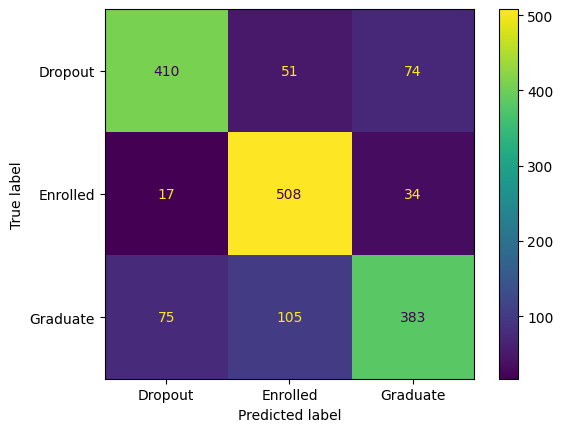

In [ ]:
# KNN Confusion Matrix
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test,knn_opt.predict(X_test))

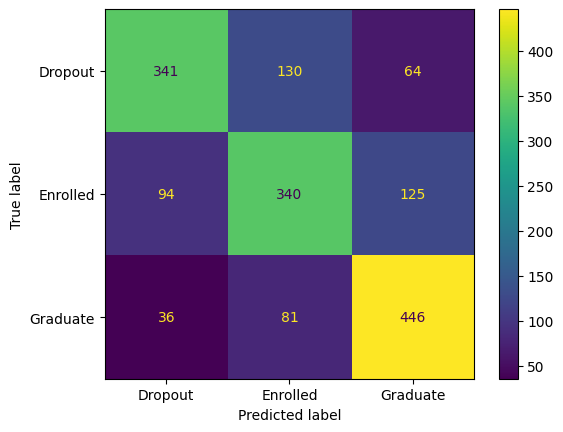

In [ ]:
# Logistic Regression Confusion Matrix
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test,lr_opt.predict(X_test))

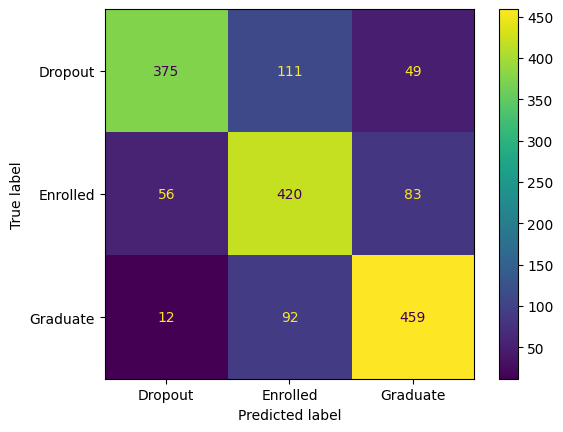

In [ ]:
# Decision Tree Confusion Matrix
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test,dt_opt.predict(X_test))

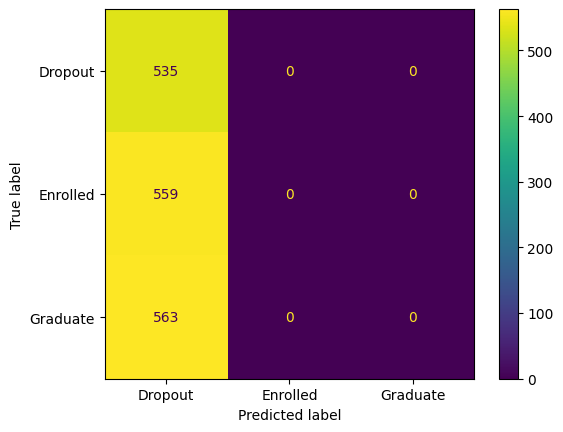

In [ ]:
# Support Vector Machines Confusion Matrix
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test,SVC_opt.predict(X_test))

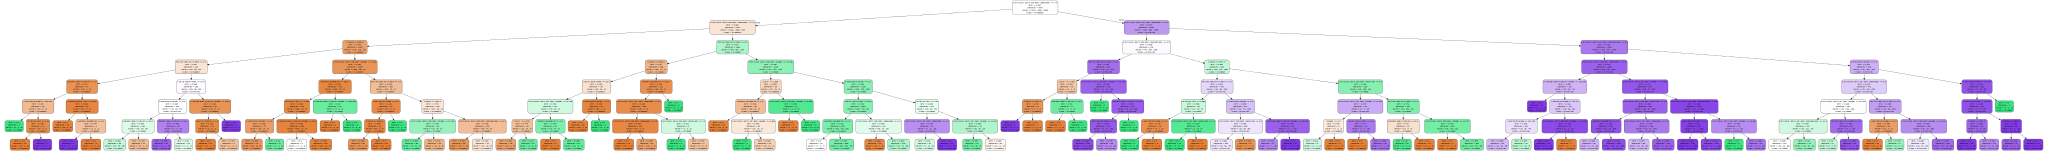

In [ ]:
# Tree view of the Decision Tree best model
dot_data1 = graph(dt_opt.best_estimator_, class_names = ["Graduate","Dropout", "Enrolled"], feature_names = X1.columns, rounded = True, filled = True)
diag1 = graphviz.Source(dot_data1)
diag1.render(format = "png",filename = "loan_tree1")
diag1

In [ ]:
#get the statements out of a tree
statements = export_text(dt_opt.best_estimator_, feature_names = list(X_train.columns))
statements

"|--- Curricular units 2nd sem (approved) <= 4.50\n|   |--- Curricular units 2nd sem (approved) <= 1.50\n|   |   |--- Course <= 4092.50\n|   |   |   |--- Tuition fees up to date <= 0.50\n|   |   |   |   |--- Mother's qualification <= 1.50\n|   |   |   |   |   |--- Admission grade <= 123.91\n|   |   |   |   |   |   |--- class: Enrolled\n|   |   |   |   |   |--- Admission grade >  123.91\n|   |   |   |   |   |   |--- Inflation rate <= 3.45\n|   |   |   |   |   |   |   |--- class: Dropout\n|   |   |   |   |   |   |--- Inflation rate >  3.45\n|   |   |   |   |   |   |   |--- class: Graduate\n|   |   |   |   |--- Mother's qualification >  1.50\n|   |   |   |   |   |--- Unemployment rate <= 15.85\n|   |   |   |   |   |   |--- class: Dropout\n|   |   |   |   |   |--- Unemployment rate >  15.85\n|   |   |   |   |   |   |--- Mother's occupation <= 6.50\n|   |   |   |   |   |   |   |--- class: Graduate\n|   |   |   |   |   |   |--- Mother's occupation >  6.50\n|   |   |   |   |   |   |   |--- cl

In [ ]:
cf = pd.DataFrame(lr_opt.best_estimator_.coef_,
                      columns = X1.columns)
cf1=pd.melt(cf,var_name="features",value_name="Coeff")

In [ ]:
# The abpve table is for top 10 coefficients in the Logistic Regression model
cf1["abs_coeff"] = abs(cf1["Coeff"])
cf1.sort_values("abs_coeff",ascending = False).head(10)

,features,Coeff,abs_coeff
74,Curricular units 2nd sem (approved),0.228745,0.228745
77,Curricular units 2nd sem (grade),0.226799,0.226799
62,Curricular units 1st sem (approved),0.189411,0.189411
65,Curricular units 1st sem (grade),0.174989,0.174989
75,Curricular units 2nd sem (grade),-0.150291,0.150291
63,Curricular units 1st sem (grade),-0.104876,0.104876
70,Curricular units 2nd sem (evaluations),0.099857,0.099857
76,Curricular units 2nd sem (grade),0.099373,0.099373
72,Curricular units 2nd sem (approved),-0.085550,0.085550
52,Age at enrollment,-0.074244,0.074244


Conclusion:

1. The data had highly imbalanced classes which had to be balanced
2. The classifiers provide a much higher performance scores than the base dummy model to predict dropout rate
3. Decision Tree and KNN are the best performing classifiers with 75-78% % accuracy scores
4. Logistic Regression provides clarity on the top features which can be actioned upon; however has a lower accuracy score of 67%
5. KNN has the highest 78 % precision but uses a complex model
6. Decision Tree provided clarity through its 7 level tree; however SVM is a litte bit of a black box with only indices information and low accuracy

Findings and next steps:

1. Ideally, we should be able to **predict as many dropouts as possible** and take corrective action to prevent it.

2. From the Decision Tree and Logistic Regression model, we can see that the following

*   curriculum credits
*   tuition fee upto date
*   course
*   age
*   parents' qualification

are i**mportant features to predict drop outs** and work on them to prevent.

3. The **Decision tree** is easy to comprehend and action on the feature values, has good accuracy of 75% and has low inference time. Hence this is recommended.

4. Rerun the model evaluation every 6 months to understand any potential changes to the parameters